# Data Mining: Predictive Analysis, Decision Tree
## Jessica Schmidt

# PART I: Research Question
## A1. Research Question and Prediction Method
Is it possible to predict the incidence of high blood pressure of a patient and identify key contributors using the decision tree method based on the available data?

## A2. Goal of the Analysis
The primary goal of the analysis is to develop a decision tree machine learning model to help the institution predict the incidence of high blood pressure of its patients.

# PART II: Method Justification
## B1. Explanation of Prediction Method and Expected Outcomes
A decision tree is a machine learning algorithm/model that can work with both categorical and numeric data to "break down the data set into smaller subsets of instances with similar values like a flowchart diagram. Each subset has a leaf node and decision node. Each node represents features, and each branch represents a decision rule (test outcome)." (Source: Sehra) Decision trees also require less computing and training time, are not sensitive to outliers, and are nonparametric. Therefore, the decision tree will work well with my dataset.

For the expected outcomes, there are two or three branches/sub_trees on a decision node, and the terminal leaf node is the end of the algorithm which represents the final decision or outcome. The topmost decision node is called the root node and is the best predictor. (Source: D209 Webinar)

## B2. Assumption of the Prediction Method
The main assumption of a decision tree prediction method is that "the data can be split into subsets based on the input variables from the data features" (source: Medium).

## B3. How Each Python Package/Library Supports the Analysis
- Pandas is used to import data into dataframe and for data manipulations.
- NumPy provides array objects for calculations.
- Seaborn and Matplotlib are used for visualizations. Seaborn is used for things like the correlation matrix whereas Matplotlib is used for things like the ROC curve.
- SciPy is used for visualizations and bivariate analyses.
- Scikit-learn is used for many things: namely, feature selection, splitting data into train and test sets, decision trees, searches over the specified parameter for an estimator, accuracy scores, getting the mean squared error metric, getting the R2, and getting the mean absolute error metric.

In [1]:
# Importing relevant packages

# Standard imports
import numpy as np
import pandas as pd

# Visualization imports
import matplotlib.pyplot as plt
import seaborn as sns

# SciPy imports
from scipy import stats

# Scikit-Learn imports
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score 
from sklearn.metrics import mean_squared_error

In [2]:
# Import CSV file
df = pd.read_csv('/Users/astro/Downloads/medical_clean.csv')

# Examine the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

In [3]:
# Print the header
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,...,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,...,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,...,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,...,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,...,2113.073274,3716.525786,2,1,3,3,5,3,4,3


# PART III: Data Preparation
## C1. Prediction Method-Relevant Data Preprocessing Goal
One prediction method relevant data preprocessing goal is the re-expression of categorical variables. Many machine learning models cannot work directly with categorical variables, and therefore we must re-express them into numeric form.

## C2. Initial Dataset Variables for Analysis
1. Numeric: Initial Days
2. Numeric: Age
3. Numeric: Doctor Visits
4. Numeric: Vitamin D Levels
5. Numeric: Vitamin D Supplements
6. Numeric: Full Meals Eaten

7. Categorical: High Blood Pressure (Target/Dependent Variable)
8. Categorical: Overweight
9. Categorical: Anxiety
10. Categorical: Reflux Esophagitis
11. Categorical: Back Pain
12. Categorical: Hyperlipidemia
13. Categorical: Stroke
14. Categorical: Arthritis

## C3. Each Step to Prepare Data

### Detecting Duplicates (Source: D206 Webinars)

In [4]:
# No Duplicates Detected
df.duplicated()
print(df.duplicated().value_counts())

False    10000
dtype: int64


### Detecting Missingness (Source: D206 Webinars)

In [5]:
# No Missing Values Detected
df.isnull().sum()

CaseOrder             0
Customer_id           0
Interaction           0
UID                   0
City                  0
State                 0
County                0
Zip                   0
Lat                   0
Lng                   0
Population            0
Area                  0
TimeZone              0
Job                   0
Children              0
Age                   0
Income                0
Marital               0
Gender                0
ReAdmis               0
VitD_levels           0
Doc_visits            0
Full_meals_eaten      0
vitD_supp             0
Soft_drink            0
Initial_admin         0
HighBlood             0
Stroke                0
Complication_risk     0
Overweight            0
Arthritis             0
Diabetes              0
Hyperlipidemia        0
BackPain              0
Anxiety               0
Allergic_rhinitis     0
Reflux_esophagitis    0
Asthma                0
Services              0
Initial_days          0
TotalCharge           0
Additional_charg

### Detecting Outliers (Source: D206 Webinars)

In [6]:
# Detecting outliers for Initial Days variable
# No outliers present
df['z_score_initial_days']=stats.zscore(df['Initial_days'])
df[['Initial_days','z_score_initial_days']].head

<bound method NDFrame.head of       Initial_days  z_score_initial_days
0        10.585770             -0.907310
1        15.129562             -0.734595
2         4.772177             -1.128292
3         1.714879             -1.244503
4         1.254807             -1.261991
...            ...                   ...
9995     51.561220              0.650217
9996     68.668240              1.300475
9997     70.154180              1.356958
9998     63.356900              1.098585
9999     70.850590              1.383429

[10000 rows x 2 columns]>

(array([2563., 1586.,  669.,  157.,   34.,  271.,  546., 1033., 1451.,
        1690.]),
 array([-1.27160124, -1.00179951, -0.73199778, -0.46219605, -0.19239432,
         0.07740741,  0.34720914,  0.61701087,  0.88681261,  1.15661434,
         1.42641607]),
 <BarContainer object of 10 artists>)

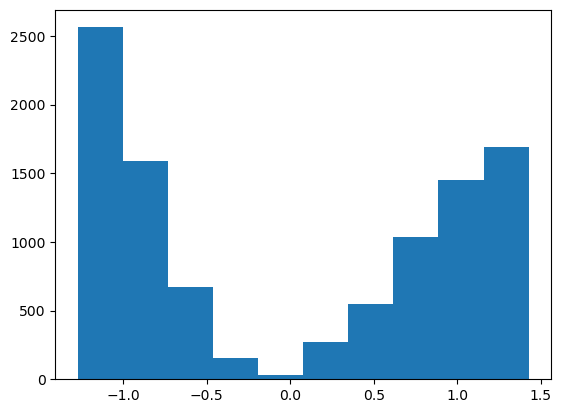

In [7]:
plt.hist(df['z_score_initial_days'])

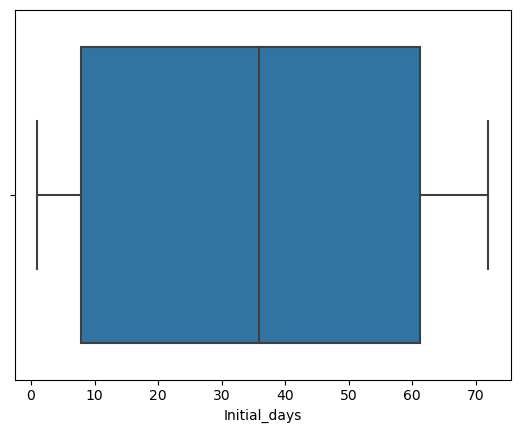

In [8]:
boxplot=sns.boxplot(x='Initial_days',data=df)

In [9]:
# Detecting outliers for Age variable
# No outliers present
df['z_score_age']=stats.zscore(df['Age'])
df[['Age','z_score_age']].head

<bound method NDFrame.head of       Age  z_score_age
0      53    -0.024795
1      51    -0.121706
2      53    -0.024795
3      78     1.186592
4      22    -1.526914
...   ...          ...
9995   25    -1.381548
9996   87     1.622691
9997   45    -0.412438
9998   43    -0.509349
9999   70     0.798948

[10000 rows x 2 columns]>

(array([1067.,  977.,  981.,  988.,  998.,  977.,  970., 1007.,  948.,
        1087.]),
 array([-1.72073600e+00, -1.37670219e+00, -1.03266837e+00, -6.88634559e-01,
        -3.44600744e-01, -5.66928963e-04,  3.43466886e-01,  6.87500701e-01,
         1.03153452e+00,  1.37556833e+00,  1.71960215e+00]),
 <BarContainer object of 10 artists>)

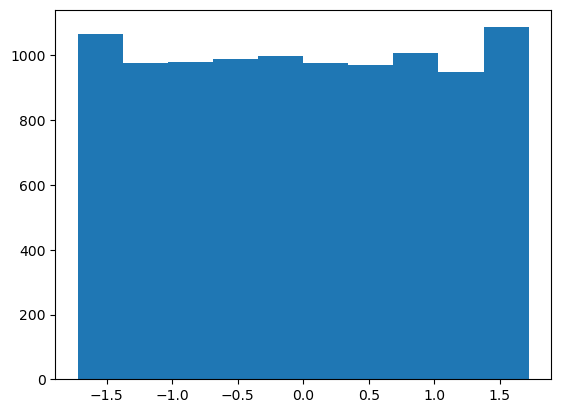

In [10]:
plt.hist(df['z_score_age'])

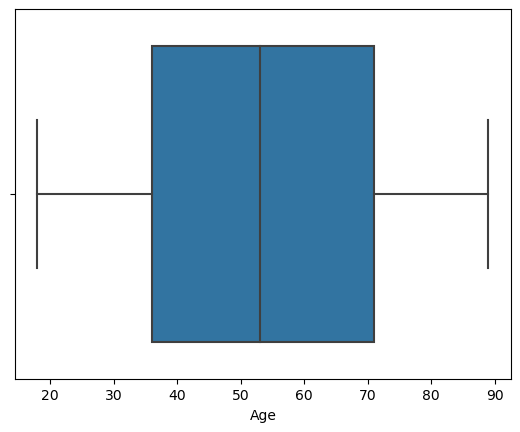

In [11]:
boxplot=sns.boxplot(x='Age',data=df)

In [12]:
# Detecting outliers via z-scores for Doc_visits variable
# No outliers present
df['z_score_doc_visits']=stats.zscore(df['Doc_visits'])
df[['Doc_visits','z_score_doc_visits']].head

<bound method NDFrame.head of       Doc_visits  z_score_doc_visits
0              6            0.944647
1              4           -0.967981
2              4           -0.967981
3              4           -0.967981
4              5           -0.011667
...          ...                 ...
9995           4           -0.967981
9996           5           -0.011667
9997           4           -0.967981
9998           5           -0.011667
9999           5           -0.011667

[10000 rows x 2 columns]>

(array([6.000e+00, 5.800e+01, 5.950e+02, 2.385e+03, 0.000e+00, 3.823e+03,
        2.436e+03, 6.340e+02, 6.100e+01, 2.000e+00]),
 array([-3.83692119, -3.07187036, -2.30681952, -1.54176869, -0.77671786,
        -0.01166703,  0.75338381,  1.51843464,  2.28348547,  3.04853631,
         3.81358714]),
 <BarContainer object of 10 artists>)

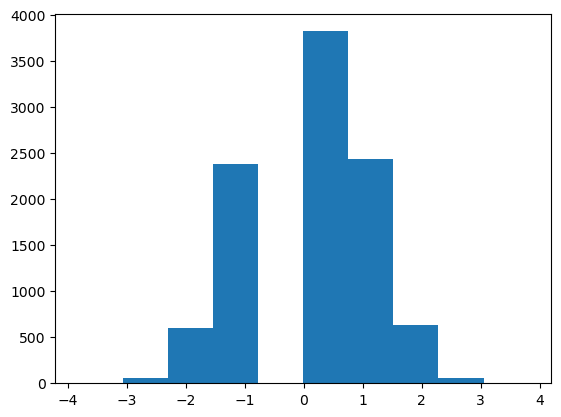

In [13]:
plt.hist(df['z_score_doc_visits'])

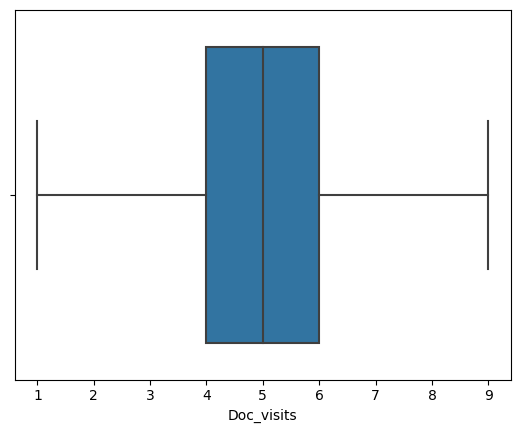

In [14]:
boxplot=sns.boxplot(x='Doc_visits',data=df)

In [15]:
# Detecting outliers for VitD_levels variable
# Minor outliers are present and will be retained since not outside realm of possibility
df['z_score_vitd']=stats.zscore(df['VitD_levels'])
df[['VitD_levels','z_score_vitd']].head

<bound method NDFrame.head of       VitD_levels  z_score_vitd
0       19.141466      0.583603
1       18.940352      0.483901
2       18.057507      0.046227
3       16.576858     -0.687811
4       17.439069     -0.260366
...           ...           ...
9995    16.980860     -0.487525
9996    18.177020      0.105476
9997    17.129070     -0.414049
9998    19.910430      0.964820
9999    18.388620      0.210377

[10000 rows x 2 columns]>

(array([   4.,   69.,  498., 1677., 3085., 2769., 1450.,  393.,   51.,
           4.]),
 array([-4.04424997, -3.22189522, -2.39954048, -1.57718573, -0.75483099,
         0.06752375,  0.8898785 ,  1.71223324,  2.53458799,  3.35694273,
         4.17929747]),
 <BarContainer object of 10 artists>)

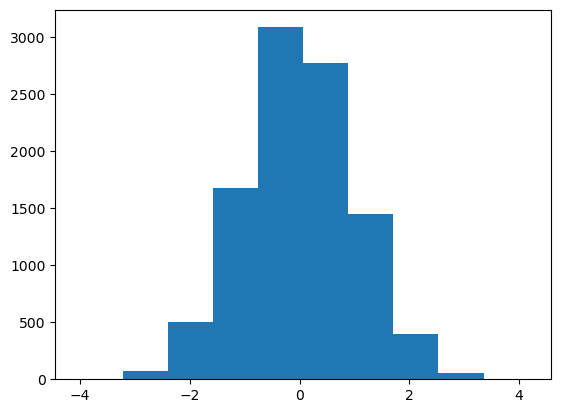

In [16]:
plt.hist(df['z_score_vitd'])

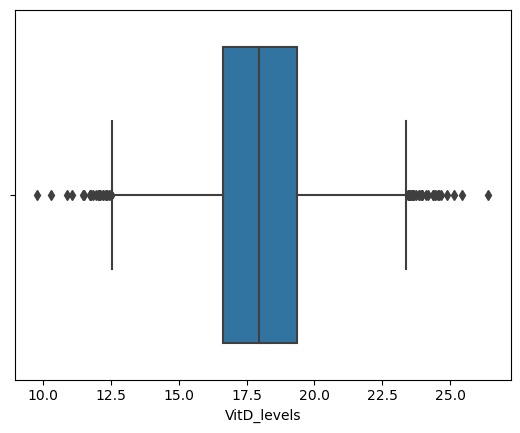

In [17]:
boxplot=sns.boxplot(x='VitD_levels',data=df)

In [18]:
# Detecting outliers for VitD_supp variable
# Minor outliers are present and will be retained since not outside realm of possibility
df['z_score_vitd_supp']=stats.zscore(df['vitD_supp'])
df[['vitD_supp','z_score_vitd_supp']].head

<bound method NDFrame.head of       vitD_supp  z_score_vitd_supp
0             0          -0.634713
1             1           0.956445
2             0          -0.634713
3             0          -0.634713
4             2           2.547602
...         ...                ...
9995          1           0.956445
9996          0          -0.634713
9997          0          -0.634713
9998          1           0.956445
9999          1           0.956445

[10000 rows x 2 columns]>

(array([6.702e+03, 2.684e+03, 0.000e+00, 5.440e+02, 0.000e+00, 0.000e+00,
        6.400e+01, 0.000e+00, 5.000e+00, 1.000e+00]),
 array([-0.63471264,  0.160866  ,  0.95644465,  1.75202329,  2.54760193,
         3.34318058,  4.13875922,  4.93433787,  5.72991651,  6.52549516,
         7.3210738 ]),
 <BarContainer object of 10 artists>)

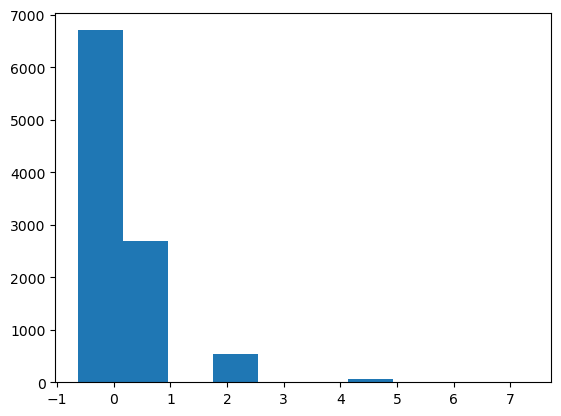

In [19]:
plt.hist(df['z_score_vitd_supp'])

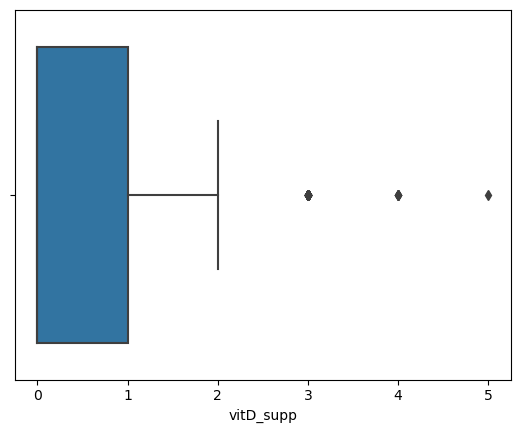

In [20]:
boxplot=sns.boxplot(x='vitD_supp',data=df)

In [21]:
# Detecting outliers for Full_meals_eaten variable
# Minor outliers are present and will be retained since not outside realm of possibility
df['z_score_meals']=stats.zscore(df['Full_meals_eaten'])
df[['Full_meals_eaten','z_score_meals']].head

<bound method NDFrame.head of       Full_meals_eaten  z_score_meals
0                    0      -0.993387
1                    2       0.990609
2                    1      -0.001389
3                    1      -0.001389
4                    0      -0.993387
...                ...            ...
9995                 2       0.990609
9996                 0      -0.993387
9997                 2       0.990609
9998                 2       0.990609
9999                 0      -0.993387

[10000 rows x 2 columns]>

(array([3.715e+03, 3.615e+03, 1.856e+03, 0.000e+00, 6.120e+02, 1.690e+02,
        0.000e+00, 2.500e+01, 6.000e+00, 2.000e+00]),
 array([-0.99338686, -0.29898822,  0.39541043,  1.08980907,  1.78420771,
         2.47860636,  3.173005  ,  3.86740364,  4.56180229,  5.25620093,
         5.95059957]),
 <BarContainer object of 10 artists>)

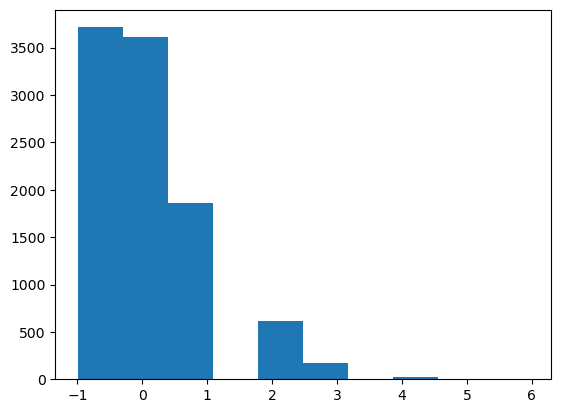

In [22]:
plt.hist(df['z_score_meals'])

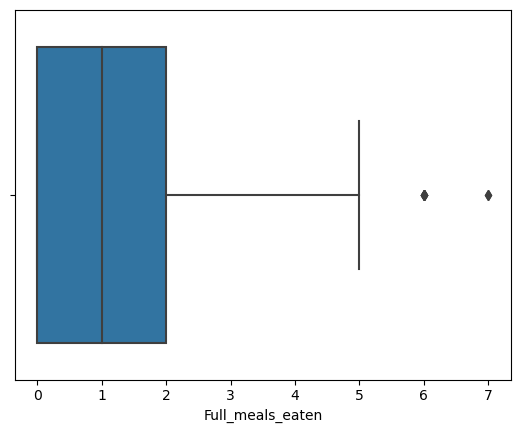

In [23]:
boxplot=sns.boxplot(x='Full_meals_eaten',data=df)

### Re-Expression of Categorical Variables

In [24]:
# Mapping bools
bool_mapping = {"Yes": 1, "No": 0}

# HighBlood variable
df["HighBlood"] = df["HighBlood"].map(bool_mapping)

# Overweight variable
df["Overweight"] = df["Overweight"].map(bool_mapping)

# Anxiety variable
df["Anxiety"] = df["Anxiety"].map(bool_mapping)

# Reflux_esophagitis variable
df["Reflux_esophagitis"] = df["Reflux_esophagitis"].map(bool_mapping)

# BackPain variable
df["BackPain"] = df["BackPain"].map(bool_mapping)

# Hyperlipidemia variable
df["Hyperlipidemia"] = df["Hyperlipidemia"].map(bool_mapping)

# Stroke variable
df["Stroke"] = df["Stroke"].map(bool_mapping)

# Arthritis variable
df["Arthritis"] = df["Arthritis"].map(bool_mapping)

# PART IV: Analysis
## D1. Training and Test Datasets

In [25]:
dt_df = df[['Initial_days', 'Age', 'Doc_visits', 'VitD_levels', 'vitD_supp', 'Full_meals_eaten', 'HighBlood',
              'Overweight', 'Anxiety', 'Reflux_esophagitis', 
              'BackPain', 'Hyperlipidemia', 'Stroke', 'Arthritis']]

In [26]:
# Separate the X variables from the Y variable
df_X = dt_df.drop(["HighBlood"], axis=1).copy()
df_y = dt_df["HighBlood"].copy()

# Recombine df_X and df_y
df = df_X.copy()
df.insert(12, column="HighBlood", value=df_y)

# Save dataframe to CSV
df.to_csv('/Users/astro/Downloads/dt_df.csv', index=False)

In [27]:
# Set X and y
X = df_X
y = df_y

# View the shape of X and y
print(X.shape)
print(y.shape)

(10000, 13)
(10000,)


In [28]:
# Hold-out validation. Split the data into training and testing sets.

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size=0.2, random_state = 15, stratify=y)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 13)
(2000, 13)
(8000,)
(2000,)


In [29]:
# Training and Test Datasets to CSV
X_train.to_csv('/Users/astro/Downloads/d209task2_Xtrain.csv', index=False)
X_test.to_csv('/Users/astro/Downloads/d209task2_Xtest.csv', index=False)
y_train.to_csv('/Users/astro/Downloads/d209task2_ytrain.csv', index=False)
y_test.to_csv('/Users/astro/Downloads/d209task2_ytest.csv', index=False)

## D2 and D3. The Analysis and Code

In [30]:
# HYPER PARAMETER TUNING FOR DECISION TREE
# Define params_dt
params_dt = {
    'max_depth' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_leaf' : [0.04, 0.06, 0.08, 0.10, 0.12, 0.14, 0.16, 0.18, 0.20, 0.22]
}

# Instantiate dt
initial_dt = DecisionTreeClassifier(random_state=42)

# Instantiate grid_dt
grid_dt = GridSearchCV(estimator=initial_dt,
                       param_grid=params_dt,
                       scoring='roc_auc',
                       cv=5,
                       n_jobs=-1)

# Fit grid search to training model
grid_dt.fit(X_train, y_train)

# Extract the best estimator
best_model = grid_dt.best_estimator_

# Predict values for test set
initial_y_pred = best_model.predict(X_test)

# Generate accuracy report for this model
acc_test = accuracy_score(y_test, initial_y_pred)
print('Test set accuracy of best decision tree: {:.5f}'.format(acc_test)) 

# Predict the test set probabilities of the positive class
initial_y_pred_proba = best_model.predict_proba(X_test)[:,1]

# Compute test_roc_auc
initial_roc_auc = roc_auc_score(y_test, initial_y_pred_proba)

# Print test_roc_auc
print('Test set ROC AUC score: {:.5f}'.format(initial_roc_auc))

Test set accuracy of best decision tree: 0.59100
Test set ROC AUC score: 0.51300


In [31]:
best_model

DecisionTreeClassifier(max_depth=2, min_samples_leaf=0.06, random_state=42)

In [32]:
# HYPERPARAMETER TUNING FOR ADABOOST
# Define params_ada
params_ada = {
    'n_estimators' : [160, 180, 200],
    'learning_rate' : [0.9, 1.0, 1.1, 1.2, 1.3]
}

# Instantiate tuned decision tree
final_dt = DecisionTreeClassifier(max_depth=2, min_samples_leaf=0.06, random_state=42)

# Instantiate initial adaboost
initial_ada = AdaBoostClassifier(estimator=final_dt, random_state=42)

# Instantiate grid_ab
grid_ada = GridSearchCV(estimator=initial_ada,
                       param_grid=params_ada,
                       scoring='roc_auc',
                       cv=5,
                       n_jobs=-1)

# Fit grid search to training model
grid_ada.fit(X_train, y_train)

# Display the most effective parameters
print(grid_ada.best_params_)

{'learning_rate': 1.1, 'n_estimators': 180}


In [33]:
# FINAL TUNED MODEL
# Instantiate dt
final_dt = DecisionTreeClassifier(max_depth=2, min_samples_leaf=0.06, random_state=42)

# Instantiate ada
final_ada = AdaBoostClassifier(estimator=final_dt, n_estimators=180, learning_rate = 1.1, random_state=42)

# Fit ada to the training set
final_ada.fit(X_train, y_train)

# Predict test set labels
final_y_pred = final_ada.predict(X_test)

# Evaluate acc_test
final_acc_test = accuracy_score(y_test, final_y_pred)
print('Test set accuracy of final decision tree model: {:.2f}'.format(final_acc_test)) 

# Compute the probabilities of obtaining the positive class
final_y_pred_proba = final_ada.predict_proba(X_test)[:,1]

# Evaluate test-set roc_auc_score
final_roc_auc = roc_auc_score(y_test, final_y_pred_proba)

# Generate Confusion Matrix
final_matrix = confusion_matrix(y_test, final_y_pred)
print("\nThe confusion matrix for this AdaBoosted Decision Tree model:")
print("Predicted No High Blood | Predicted High Blood")
print(f"                   {final_matrix[0]} Actual No High Blood")
print(f"                   {final_matrix[1]} Actual High Blood\n")

# Generate mean_squared_error and root mean squared error
mse = mean_squared_error(y_test, final_y_pred)
root_mse = mse**(1/2)
print(f"The mean squared error of this model is: {mse}")
print(f"The root mean squared error of this model is: {round(root_mse, 2)}\n\n")

# Generate classification report
print(classification_report(y_test, final_y_pred))

print('\nThe Area Under the Curve (AUC) score of the final decision tree model is: {:.2f}'.format(final_roc_auc))

Test set accuracy of final decision tree model: 0.58

The confusion matrix for this AdaBoosted Decision Tree model:
Predicted No High Blood | Predicted High Blood
                   [1008  174] Actual No High Blood
                   [672 146] Actual High Blood

The mean squared error of this model is: 0.423
The root mean squared error of this model is: 0.65


              precision    recall  f1-score   support

           0       0.60      0.85      0.70      1182
           1       0.46      0.18      0.26       818

    accuracy                           0.58      2000
   macro avg       0.53      0.52      0.48      2000
weighted avg       0.54      0.58      0.52      2000


The Area Under the Curve (AUC) score of the final decision tree model is: 0.51


Please see the code of the prediction analysis that is being submitted as part of this PA.

# PART V: Data Summary and Implications

## E1. Explanation of Accuracy and MSE of Predicted Model
The Accuracy of the decision tree model can be seen in the "Test set accuracy of final decision tree model" above which in this case is 0.58. The confusion matrix is also a good indication of the accuracy of the model: (1008 + 146) 1154 predictions out of 2000 were correct and (174 + 672) 846 predictions out of 2000 were incorrect. This equates to that 58% of the model was accurately predicted as demonstrated by the test set accuracy of final decision tree model.

The Mean Squared Error (MSE) of the model is 0.423. Generally speaking, a lower MSE is better since the MSE is reflective of the magnitude of error. Therefore, in this case, the MSE of 0.423 is not particularly good, but it is better than if it were higher (i.e., if it were 0.5 or higher, etc.).

## E2. Results and Implications
For the results of this decision tree model, we can turn to the Area Under the Curve (AUC) score. In this case, we can see that the AUC is 0.51. This means that the model is only slightly better than random since a score of 1 is completely correct and a score of 0 is completely incorrect. However, unfortunately, this means that the model is only barely better than random and the implications for usefullness are middling at best.

## E3. Limitation of the Analysis
The biggest limitation of this analysis is that there are only 10000 datapoints to use from the med dataset, and that is not very many in the grand scheme of things. If we were to have more data in a bigger dataset, we would be able to make more robust models which would result in better analyses.

## E4. Recommended Course of Action
My recommended course of action for this model is unfortunately the same as my previous recommended course of action from Task 1: although this model is slightly better than the other one based on the AUC from part E2, it is not intensive enough to be of great use to the institution for the research question at hand as to the incidence of high blood pressure from part A1. In summary, I recommend that other types of analysis be pursued rather than relying or using this particular model.